## ML Lab Assignment-6

#### Sai Karthik AP21110010310 CSE-E

1. Implement a generalized Perceptron Model that can be trained to realize AND, OR, and
NAND functions. Comment on the quality of prediction in each case.
Train the perceptron for implementing XOR function and comment on the quality of
prediction.
Perceptron Learning Rule:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [21]:

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, training_inputs, targets, epochs):
        for _ in range(epochs):
            for inputs, target in zip(training_inputs, targets):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (target - prediction) * inputs
                self.weights[0] += self.learning_rate * (target - prediction)

def test_logic_gate(gate_type):
    if gate_type == 'AND':
        training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        targets = np.array([0, 0, 0, 1])
    elif gate_type == 'OR':
        training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        targets = np.array([0, 1, 1, 1])
    elif gate_type == 'NAND':
        training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        targets = np.array([1, 1, 1, 0])
    else:
        print("Invalid gate type!")
        return

    perceptron = Perceptron(input_size=2)
    perceptron.train(training_inputs, targets, epochs=10)

    print(f"Testing {gate_type} gate:")
    for inputs, target in zip(training_inputs, targets):
        prediction = perceptron.predict(inputs)
        print(f"Inputs: {inputs}, Target: {target}, Prediction: {prediction}")

test_logic_gate('AND')
test_logic_gate('OR')
test_logic_gate('NAND')

def test_xor_gate():
    training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    target_xor = np.array([0, 1, 1, 0])

    perceptron_and_not = Perceptron(input_size=2)
    perceptron_and_not.train(np.array([[0, 0], [1, 0]]), np.array([0, 1]), epochs=10)

    perceptron_not_and = Perceptron(input_size=2)
    perceptron_not_and.train(np.array([[0, 1], [1, 1]]), np.array([1, 0]), epochs=10)

    perceptron_or = Perceptron(input_size=2)
    perceptron_or.train(np.array([[0, 1], [1, 0], [1, 1]]), np.array([1, 1, 1]), epochs=10)

    print("Testing XOR gate:")
    for inputs, target in zip(training_inputs, target_xor):
        prediction_and_not = perceptron_and_not.predict(inputs)
        prediction_not_and = perceptron_not_and.predict(inputs)
        prediction_xor = perceptron_or.predict(np.array([prediction_and_not, prediction_not_and]))
        print(f"Inputs: {inputs}, Target: {target}, Prediction: {prediction_xor}")

test_xor_gate()

Testing AND gate:
Inputs: [0 0], Target: 0, Prediction: 0
Inputs: [0 1], Target: 0, Prediction: 0
Inputs: [1 0], Target: 0, Prediction: 0
Inputs: [1 1], Target: 1, Prediction: 1
Testing OR gate:
Inputs: [0 0], Target: 0, Prediction: 0
Inputs: [0 1], Target: 1, Prediction: 1
Inputs: [1 0], Target: 1, Prediction: 1
Inputs: [1 1], Target: 1, Prediction: 1
Testing NAND gate:
Inputs: [0 0], Target: 1, Prediction: 1
Inputs: [0 1], Target: 1, Prediction: 1
Inputs: [1 0], Target: 1, Prediction: 1
Inputs: [1 1], Target: 0, Prediction: 0
Testing XOR gate:
Inputs: [0 0], Target: 0, Prediction: 1
Inputs: [0 1], Target: 1, Prediction: 1
Inputs: [1 0], Target: 1, Prediction: 1
Inputs: [1 1], Target: 0, Prediction: 1


2. Download the Iris dataset. Consider first two classes [Iris-setosa (Label as -1) and Iris-
virginica (Label as 1) ]. Prepare a separate dataset for these two classes only considering
two features such as Sepal Length and Petal Length. Train a two input Perception model.
Draw the scatter plot and decision boundary obtained through Perceptron learning for the
dataset.

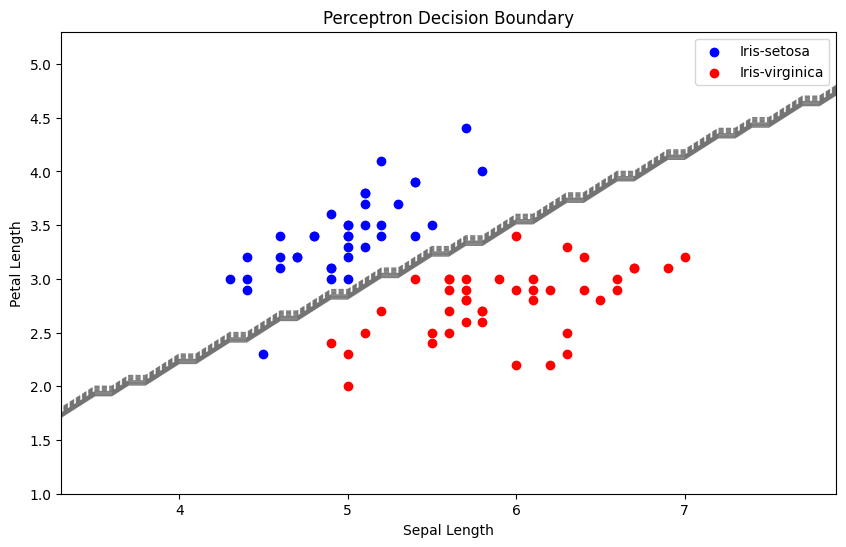

In [22]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X = X[y != 2]
y = y[y != 2]

y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X_train, y_train)

plt.figure(figsize=(10, 6))

plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='blue', label='Iris-setosa')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Iris-virginica')

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', linewidths=1, alpha=0.5)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.title('Perceptron Decision Boundary')
plt.show()